# Project
Explatory data analysis and machine learning model of [Car Evaluation Dataset from UCI ML Repository](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation).

# Dataset

### Number of Instances
1728 (instances completely cover the attribute space)


### Attribute Values
|Attribute|Value|Description|
|---|---|---|
|buying|v-high, high, med, low|Buying price|
|maint|v-high, high, med, low|Price of the maintenance|
|doors|2, 3, 4, 5-more|Number of doors|
|persons|2, 4, more|Capacity in terms of persons to carry|
|lug_boot|small, med, big|The size of luggage boot|
|safety|low, med, high|Estimated safety of the car|
   
### Class Distribution (number of instances per class)

|class|N|N[%]|
|---|---|---|
|unacc|1210|(70.023 %)|
|acc|384|(22.222 %)|
|good|69|( 3.993 %)|
|v-good|65|( 3.762 %)|


# Importing Libraries

In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
from matplotlib import pyplot

import sklearn
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [182]:
df = pd.read_csv("dataset/car.data", header=None)
df_with_columns = df
df_with_columns.columns = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"]

df_with_columns.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


## Transform columns into numbers 

In [183]:
# Transform
label_encoder = preprocessing.LabelEncoder()

def transform_column(name):
    df_with_columns[name] = label_encoder.fit_transform(df_with_columns[name])
    
transform_column("buying")
transform_column("maint")
transform_column("lug_boot")
transform_column("safety")

transform_column("class")

# Reaplace "more" values to numbers
df_with_columns["doors"] = df_with_columns["doors"].replace("5more", 5)
df_with_columns["persons"] = df_with_columns["persons"].replace("more", 5)

df_with_columns.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,2,2,2,1,2
1,3,3,2,2,2,2,2
2,3,3,2,2,2,0,2
3,3,3,2,2,1,1,2
4,3,3,2,2,1,2,2


## Understanding correlations between the attributes

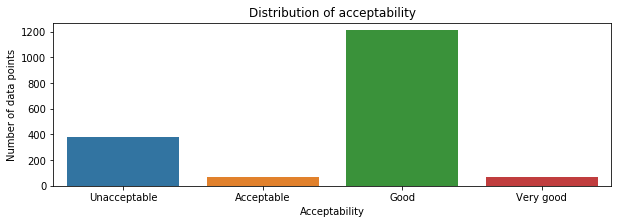

In [184]:
plt.rcParams['figure.figsize'] = [10, 3]

df_plot = df_with_columns

classes = [0, 1, 2, 3]

sns.countplot(data=df_plot, x = 'class')

plt.title('Distribution of acceptability')
plt.xlabel('Acceptability')
plt.ylabel("Number of data points")

plt.xticks(classes, ('Unacceptable', 'Acceptable', 'Good', 'Very good'))
plt.show()

# Choosing the estimator

## Naive-Bayes

In [185]:
X = df_with_columns.drop(columns=["class"])
y = df_with_columns.drop(columns=["buying", "maint", "doors", "persons", "lug_boot", "safety"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

clf = GaussianNB()
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)

accuracy_score(y_test, predictions)

0.7075306479859895

## SVM

In [186]:
clf = SVC()
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)

accuracy_score(y_test, predictions)

0.9036777583187391

## Decision-tree

In [187]:
clf = DecisionTreeClassifier(max_depth=13, min_samples_leaf=7)
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)

accuracy_score(y_test, predictions)

0.9439579684763573

## Hyperparameter tuning

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/model_selection/_search.py:842: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best: -0.192456 using {'max_depth': 7, 'min_samples_leaf': 3}


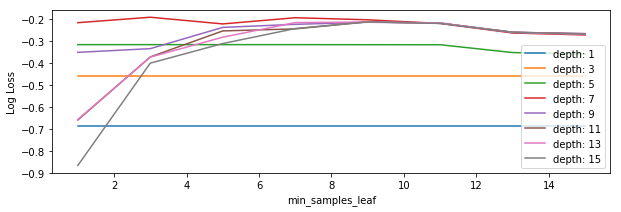

In [188]:
# Params to tune and the range values
max_depth = range(1, 17, 2)
min_samples_leaf = range(1, 17, 2)
param_grid = {'max_depth':max_depth, 'min_samples_leaf':min_samples_leaf}
# or you can use: param_grid = dict(max_depth=max_depth, min_samples_leaf=min_samples_leaf)

# Cross validator
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)

# Classifier to tune (is a decision tree)
clf = DecisionTreeClassifier()

# Grid search estimator
grid_search = GridSearchCV(clf, param_grid, scoring="neg_log_loss", n_jobs=1, cv=kfold)
grid_result = grid_search.fit(X_train, y_train)

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

"""for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    """
"""# Plot
pyplot.errorbar(max_depth, means, yerr=stds)
pyplot.title("Decision Tree max_depth vs Log Loss")
pyplot.xlabel('max_depth')
pyplot.ylabel('Log Loss')
pyplot.savefig('max_depth.png')"""

# plot results
scores = np.array(means).reshape(len(max_depth), len(min_samples_leaf))
for i, value in enumerate(max_depth):
    pyplot.plot(min_samples_leaf, scores[i], label='depth: ' + str(value))
pyplot.legend()
pyplot.xlabel('min_samples_leaf')
pyplot.ylabel('Log Loss')
pyplot.savefig('min_samples_leaf_vs_max_depth.png')


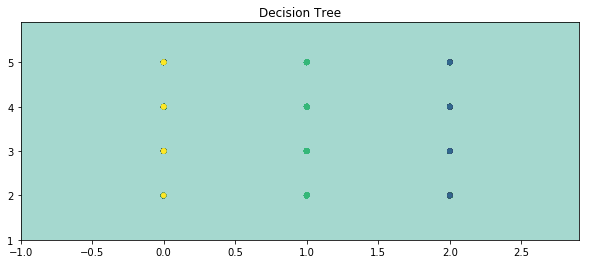

In [189]:
X = X.values
X = X.astype(int)
X = X[:, [5, 2]]
y = y.values
y = y.astype(int)
y = y[:, 0]

clf = DecisionTreeClassifier(splitter='best')
clf.fit(X, y)

# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(sharex='col', sharey='row', figsize=(10, 4))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

axarr.contourf(xx, yy, Z, alpha=0.4)
axarr.scatter(X[:, 0], X[:, 1], s=20, c=y)
axarr.set_title('Decision Tree')
    
plt.show()